In [1]:
import tensorflow as tf
from results.samuel.ResNet50V2.custom import *
model_path = "results/samuel/ResNet50V2/model.tf"
from load_data import CustomDataGenerator

In [2]:
img_dir = "images/"
mask_dir = "labels/"
image_extension = ".png"
mask_extension = ".png"
img_size = (256, 256)
batch_size = 16
horizontal_split = 12
vertical_split = 1

train, validation = CustomDataGenerator.generate_data(batch_size, img_size, img_dir, mask_dir,
                                                        horizontal_split, vertical_split, image_extension, mask_extension, 
                                                        preprocess_fcn, validation_split=0.01, flip=True, shift = shift, onelabel=onelabel, seed=seed)

images, masks = train.__getitem__(2)

Number of samples:  95800
Classes: [  0. 142. 255.]
Number of samples:  968
Classes: [  0. 142. 255.]


In [3]:
model = tf.keras.models.load_model(model_path)

1/1 [==============================] - 6s 6s/step


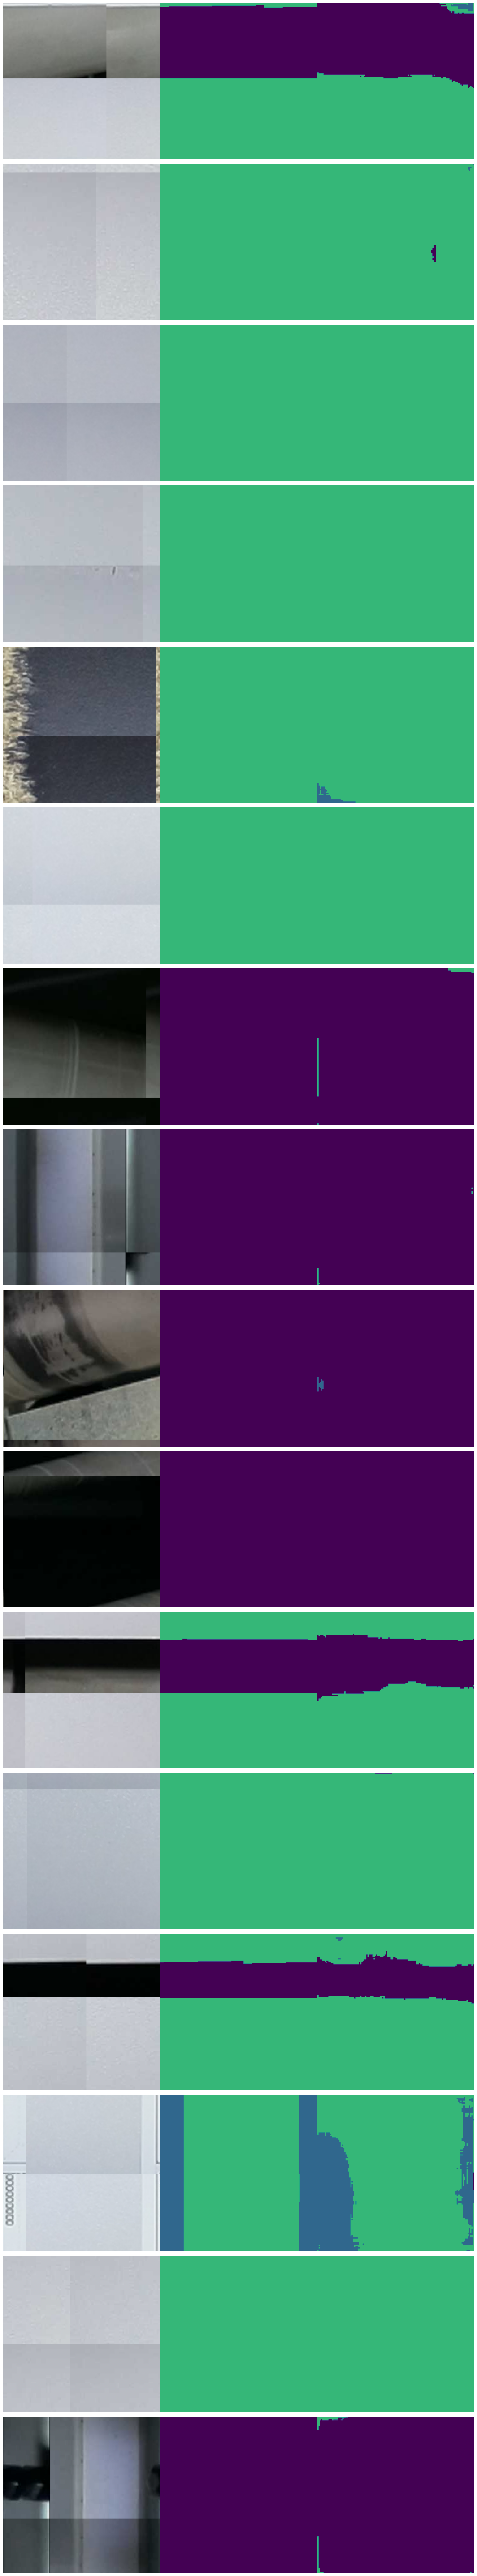

In [4]:
preds = model.predict(x=images, verbose=1)

train.plot_prediction(2, preds)